In [2]:
from tqdm import tqdm                                  # type: ignore
import numpy as np                                     # type: ignore 
import torch                                           # type: ignore 
import torch.nn as nn                                  # type: ignore                     
import torch.optim as optim                            # type: ignore                 
import torch.utils.data as data                        # type: ignore     
import torchvision.transforms as transforms            # type: ignore 
import matplotlib.pyplot as plt                        # type: ignore 

import medmnist                                        # type: ignore         
from medmnist import INFO, Evaluator                   # type: ignore       
from medmnist import BloodMNIST

import warnings
warnings.filterwarnings('ignore')     

In [5]:
train_dataset = BloodMNIST(split="train", download=False)

In [17]:
image, label = train_dataset[1]

In [15]:
mapping = {0: 'Basófilos', 1: 'Eosinófilos', 2: 'Eritroblastos', 3: 'Granulocitos imaturos',
           4: 'Linfócitos', 5: 'Monócitos', 6: 'Neutrófilos', 7: 'Plaquetas'}

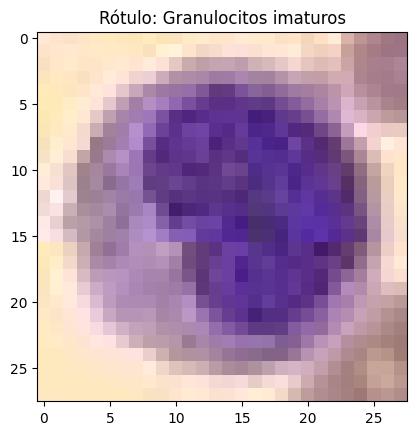

In [18]:
plt.imshow(image)
plt.title(f"Rótulo: {mapping[label[0]]}")
plt.show()

In [22]:
np.asarray(image).shape

(28, 28, 3)

In [3]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v3.0.1 @ https://github.com/MedMNIST/MedMNIST/


## We first work on a 2D dataset with size 28x28

In [4]:
#data_flag = 'pathmnist'
data_flag = 'bloodmnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [4]:
info

{'python_class': 'BloodMNIST',
 'description': 'The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.',
 'url': 'https://zenodo.org/records/10519652/files/bloodmnist.npz?download=1',
 'MD5': '7053d0359d879ad8a5505303e11de1dc',
 'url_64': 'https://zenodo.org/records/10519652/files/bloodmnist_64.npz?download=1',
 'MD5_64': '2b94928a2ae4916078ca51e05b6b800b',
 'url_128': 'https://zenodo.org/records/10519652/files/bloodmnist_128.npz?download=1',
 'MD5_128': 'adace1e0ed228fccda1f39692059dd4c',
 'url_224': 'https://zenodo.org/records/10519652/files/bloodmnist

In [5]:
n_classes

8

In [6]:
DataClass

medmnist.dataset.BloodMNIST

## First, we read the MedMNIST data, preprocess them and encapsulate them into dataloader form.

In [5]:
# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

Using downloaded and verified file: C:\Users\marck\.medmnist\bloodmnist.npz
Using downloaded and verified file: C:\Users\marck\.medmnist\bloodmnist.npz
Using downloaded and verified file: C:\Users\marck\.medmnist\bloodmnist.npz


In [10]:
len(train_dataset), len(test_dataset), len(pil_dataset)

(11959, 3421, 11959)

In [8]:
len(train_loader_at_eval)

47

In [12]:
47*128*2

12032

In [ ]:
# Using downloaded and verified file: C:\Users\marck\.medmnist\bloodmnist.npz

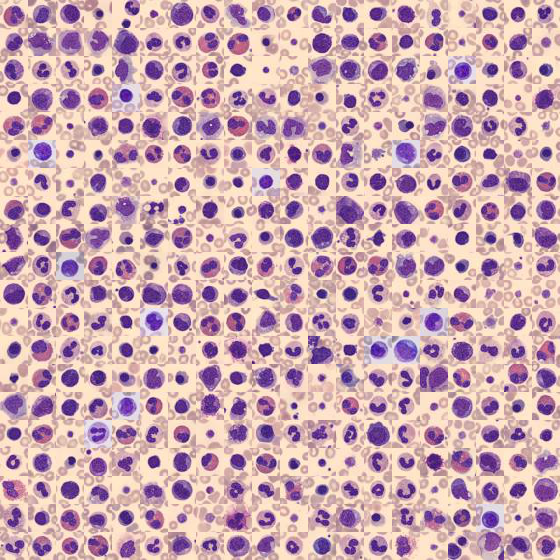

In [8]:
# montage
train_dataset.montage(length=20)

In [9]:
test_dataset

Dataset BloodMNIST of size 28 (bloodmnist)
    Number of datapoints: 3421
    Root location: C:\Users\marck\.medmnist
    Split: test
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    Licens

In [10]:
train_dataset

Dataset BloodMNIST of size 28 (bloodmnist)
    Number of datapoints: 11959
    Root location: C:\Users\marck\.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    Lice

In [ ]:
# {'train': 11959, 'val': 1712, 'test': 3421}

In [11]:
image, label = train_dataset[0]

In [12]:
image.shape, label

(torch.Size([3, 28, 28]), array([7]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image shape: torch.Size([3, 28, 28])


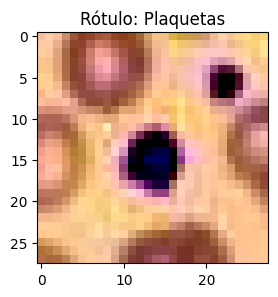

In [13]:
mapping = {0: 'Basófilos', 1: 'Eosinófilos', 2: 'Eritroblastos', 3: 'Granulocitos imaturos',
           4: 'Linfócitos', 5: 'Monócitos', 6: 'Neutrófilos', 7: 'Plaquetas'}
label_nums = list(mapping.keys())

plt.figure(figsize=(5, 3))
print(f"Image shape: {image.shape}")
plt.imshow((np.squeeze(image.permute(1, 2, 0))))
plt.title(f"Rótulo: {mapping[label[0]]}")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

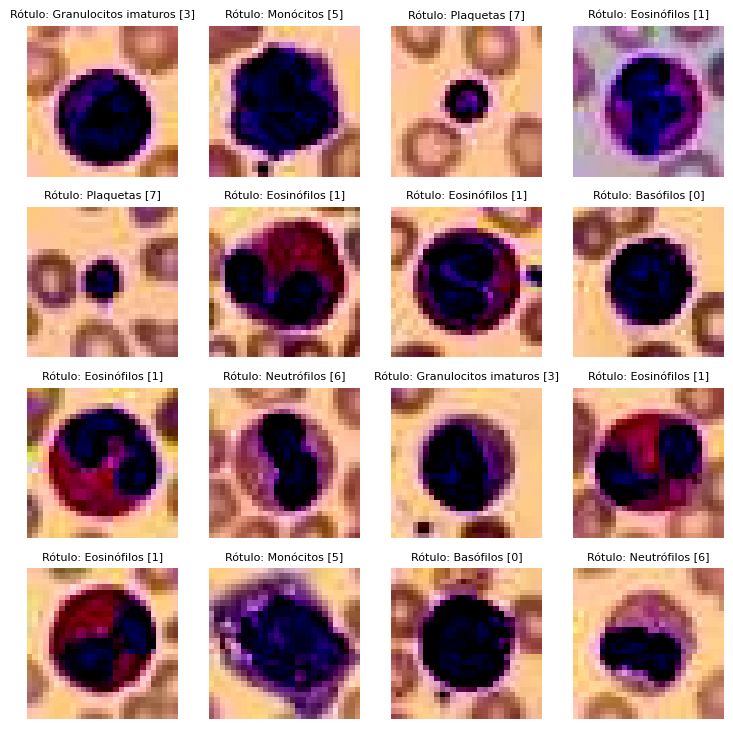

In [14]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
    img, label = train_dataset[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow((np.squeeze(img.permute(1, 2, 0))))
    plt.title(f"Rótulo: {mapping[label[0]]} [{label[0]}]", fontsize=8)
    plt.axis(False);

In [15]:
img, label = next(iter(train_loader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([128, 3, 28, 28]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([128, 1])


In [16]:
from timeit import default_timer as timer 

def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [17]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.layer_stack(x)
        
        return x

In [ ]:
28*28*3

In [18]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_1 = MultiLayerPerceptron(input_shape=3*784, # one for every pixel (28x28)
    hidden_units=128, # how many units in the hidden layer
    output_shape=len(label_nums) # one for every class (8 classes)
)
model_1

MultiLayerPerceptron(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2352, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=8, bias=True)
  )
)

In [19]:
# define loss function and optimizer
if task == "multi-label, binary-class":
    criterion = nn.BCEWithLogitsLoss()
else:
    criterion = nn.CrossEntropyLoss()
    
optimizer = optim.SGD(model_1.parameters(), lr=lr, momentum=0.9)

In [20]:
print("Task: ", task)

Task:  multi-class


In [21]:
print("Criterion: ", criterion)
print("Optimizer: ", optimizer)

Criterion:  CrossEntropyLoss()
Optimizer:  SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [22]:
# train
for epoch in range(NUM_EPOCHS):
    train_correct = 0
    train_total = 0
    test_correct = 0
    test_total = 0
    
    model_1.train()
    for inputs, targets in tqdm(train_loader):
        # forward + backward + optimize
        optimizer.zero_grad()
        outputs = model_1(inputs)
        
        if task == 'multi-label, binary-class':
            targets = targets.to(torch.float32)
            loss = criterion(outputs, targets)
        else:
            targets = targets.squeeze().long()
            loss = criterion(outputs, targets)
        
        loss.backward()
        optimizer.step()

100%|██████████| 94/94 [00:02<00:00, 37.19it/s]


In [23]:
# evaluation
def test(split):
    model_1.eval()
    y_true = torch.tensor([])
    y_score = torch.tensor([])
    
    data_loader = train_loader_at_eval if split == 'train' else test_loader

    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model_1(inputs)

            if task == 'multi-label, binary-class':
                targets = targets.to(torch.float32)
                outputs = outputs.softmax(dim=-1)
            else:
                targets = targets.squeeze().long()
                outputs = outputs.softmax(dim=-1)
                targets = targets.float().resize_(len(targets), 1)

            y_true = torch.cat((y_true, targets), 0)
            y_score = torch.cat((y_score, outputs), 0)

        y_true = y_true.numpy()
        y_score = y_score.detach().numpy()
        
        evaluator = Evaluator(data_flag, split)
        metrics = evaluator.evaluate(y_score)
    
        print('%s  auc: %.3f  acc:%.3f' % (split, *metrics))

        
print('==> Evaluating ...')
test('train')
test('test')

==> Evaluating ...
train  auc: 0.934  acc:0.678
test  auc: 0.932  acc:0.669


In [29]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), ncols=2)
    ax1.imshow((np.squeeze(img.permute(1, 2, 0))))
    #ax1.imshow(img.resize_(3, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax1.set_title(f"Rótulo: {mapping[label.item()]} [{label.item()}]", fontsize=10) # (f"Rótulo: {mapping[label[0]]} [{label[0]}]", fontsize=8)
    ax2.barh(np.arange(8), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(8))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(8))
    elif version == "Blood":
        ax2.set_yticklabels([0,
                            1,
                            2,
                            3,
                            4,
                            5,
                            6,
                            7], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [40]:
dataiter = iter(test_loader)
images, labels = next(dataiter)
label = labels[0]

print(label)

tensor([3], dtype=torch.int32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


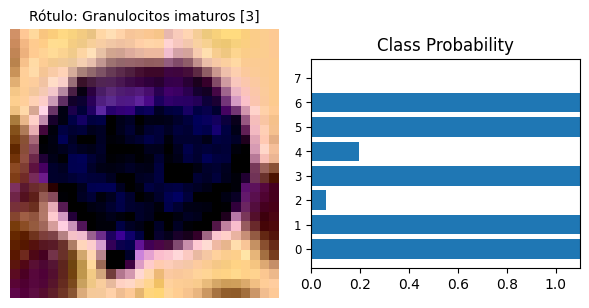

In [36]:
model_1.eval()

dataiter = iter(test_loader)
images, labels = next(dataiter)
img = images[0]
label = labels[0]
# Convert 2D image to 1D vector
img = img.view(1, 784*3)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model_1.forward(img)

ps = torch.exp(output)

view_classify(img.resize_(3, 28, 28), ps, version='Blood')

In [26]:
mapping

{0: 'Basófilos',
 1: 'Eosinófilos',
 2: 'Eritroblastos',
 3: 'Granulocitos imaturos',
 4: 'Linfócitos',
 5: 'Monócitos',
 6: 'Neutrófilos',
 7: 'Plaquetas'}